# Introduction to Python
Welcome to COMP9417!  Throughout this course, you will be introduced to a variety of machine learning algorithms.  These labs are intended to give you practical experience with setting up and running these algorithms on realistic data sets.

There are a few concepts you should have some understanding of to complete this work:
* <a href="https://www.tutorialspoint.com/python/python_basic_syntax.htm">Basic Python</a>
* <a href="https://onlinestatbook.com/2/regression/intro.html">Linear Regression</a>

##  Some practice for machine learning packages
For the lab work in this course, we will be using the Python language, which you may or may not have used before. If not, it may help you to do some independent study to pick up the basics. However, this is not a Python course - the focus is on applying practical machine learning algorithms, and Python is simply a tool for us to do so.

* <b>Numpy</b> is a popular Numerical Python data processing library. 

* <b>SciPy</b>  is an open-source software for scientific computing and covers the disciplines of mathematics, science and engineering. 

* <b>Pandas</b>  is a data storage and analysis library that primarily provides utilities to deal with structured records, normally stored as CSVs or tables.

* <b>Scikit-Learn</b> is a Python library for high performance Machine Learning.

* <b>Matplotlib</b> is a Python plotting library that allows you to make interactive plots.

* <b>Seaborn</b>  is a Python data visualization library based on matplotlib, providing a high-level interface for drawing attractive and informative statistical graphics.

* <b>TensorFlow</b>  is a deep learning library developed by Google.

### Import all the packages that we will learn or practice
Prior to starting, you should check whether you have installed the following packages like numpy, scipy, pandas, scikit-learn, matplotlib and seaborn.

If you are using Linux, you can use the following code in a terminal to install these packages:

pip install numpy scipy pandas scikit-learn matplotlib seaborn

If you are using anaconda, you can use the following code at the Anaconda prompt to install these packages:

To run code in the Jupyter environment, you simply click in the code area and type ctrl+enter

In [8]:
import arff
import numpy as np
import scipy
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## NumPy practice
### basic

In [5]:
list_object=[1,2,3,4]                          # Creating a list object
array=np.array(list_object)                    # Converting the original list object into numpy array object
array=np.array(list_object,dtype=np.float32)   # Specifying data type
zeros=np.zeros((4,3))                          # Creating matrix with 4*3 zeros
print("list object: \n")
print(list_object)
print()
print("array object: \n")
print(array)
print()
print("zero matix: \n")
print(zeros)
print()

list object: 

[1, 2, 3, 4]

array object: 

[1. 2. 3. 4.]

zero matix: 

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]



### Operators
Arithmetic operators

In [6]:
x=np.array([4,6])
y=np.array([2,3])
z = x + y                                # x and y are numpy array with the same size
print("z = x + y: ",z)
z = x * y
print("z = x * y: ",z)
z = x / y
print("z = x / y: ",z)

z = x + y:  [6 9]
z = x * y:  [ 8 18]
z = x / y:  [2. 2.]


Comparison operators

In [8]:
print("x: ", x)
print("y: ", y)
z = x > y
print("z = x > y:", z)
z = x > 5
print("z = x > 5:", z)

x:  [4 6]
y:  [2 3]
z = x > y: [ True  True]
z = x > 5: [False  True]


Unary operators

In [10]:
A = np.arange(9).reshape((3,3)) 
print("matrix A: \n",A)
sum_a = np.mean(A)
print("mean:", sum_a)
col_sum = A.sum(axis = 0)               # calculates sum of each column
print("col_sum", col_sum)
row_sum = A.sum(axis = 1)               # calculates sum of each row
print("row_sum", row_sum)

matrix A: 
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
mean: 4.0
col_sum [ 9 12 15]
row_sum [ 3 12 21]


## Data Exploration Using Pandas
loading the diabetes data set and save the data set into csv file, following by loading the csv file.

In [7]:
from sklearn import datasets

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Putting the dataset into pandas DataFrame
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
target = pd.DataFrame(diabetes.target, columns=["target"])

# Combining the two dataframes into one
df = pd.concat([data,target], axis=1)

# Saving the data frame into "diabetes.csv" file 
df.to_csv("diabetes.csv", index=False) 

#Loading the data from csv file
csv_df = pd.read_csv("diabetes.csv")

Analyzing DataFrames

In [13]:
# prints the first few rows of the dataframe
csv_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [14]:
# provides a concise summary of the dataframe
csv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
age       442 non-null float64
sex       442 non-null float64
bmi       442 non-null float64
bp        442 non-null float64
s1        442 non-null float64
s2        442 non-null float64
s3        442 non-null float64
s4        442 non-null float64
s5        442 non-null float64
s6        442 non-null float64
target    442 non-null float64
dtypes: float64(11)
memory usage: 38.1 KB


In [13]:
# provides descriptive statistics of central tendency, dispersion and shape
csv_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634599e-16,1.296411e-16,-8.042209e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.575274e-16,3.780755e-16,-3.830854e-16,-3.411950e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


Views and Slicing

In [16]:
bmi = csv_df["bmi"]                       # get the column of bmi

csv_df["fat"] = csv_df["bmi"] > 0         # creates a new column with True / False values is bmi > 0

csv_df[csv_df.fat]                        # selecting rows of entire dataframe where bmi > 0

csv_df[csv_df.fat][:10]                   # selecting first 10 rows where bmi > 0

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,fat
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0,True
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0,True
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0,True
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0,True
11,0.027178,0.050680,0.017506,-0.033214,-0.007073,0.045972,-0.065491,0.071210,-0.096433,-0.059067,69.0,True
16,-0.005515,-0.044642,0.042296,0.049415,0.024574,-0.023861,0.074412,-0.039493,0.052280,0.027917,166.0,True
17,0.070769,0.050680,0.012117,0.056301,0.034206,0.049416,-0.039719,0.034309,0.027368,-0.001078,144.0,True
23,0.045341,0.050680,0.060618,0.031053,0.028702,-0.047347,-0.054446,0.071210,0.133599,0.135612,245.0,True
24,-0.063635,-0.044642,0.035829,-0.022885,-0.030464,-0.018850,-0.006584,-0.002592,-0.025952,-0.054925,184.0,True
27,-0.023677,-0.044642,0.059541,-0.040099,-0.042848,-0.043589,0.011824,-0.039493,-0.015998,0.040343,85.0,True


In [14]:
## Matplotlib practice

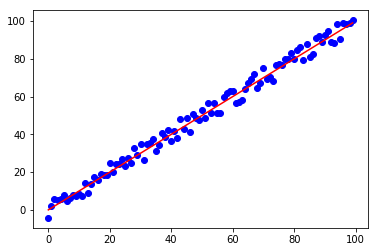

In [18]:
import matplotlib.pyplot as plt
import numpy as np

N = 100                                              # setting number of points
data_x = np.arange(N)                                # Generate an array with values from 0 to N
rdm = (np.random.rand(N)-0.5)                        # rand(N) returns N random numbers between 0 and 1
data_y1 = data_x + rdm*10                            # Linear wrt x, with noise
plt.scatter(data_x, data_y1, color='blue')           # Scatter plot; color parameter is optional
plt.plot(data_x,data_x, "r-")                        # Line plot to show 'true' function without noise in red
plt.show()

#### Reading Datasets
In order to perform machine learning, we typically need a significant amount of data. By understanding the data, analysing patterns and training our algorithms, we can achieve meaningful results. Scikit-learn makes it easy for us to access some pre-defined 'toy' datasets to practice our understanding.

In this example, we'll use the "diabetes" dataset, which contains records for 442 diabetes patients. The 10 features in the dataset represent each patient's age, sex, body mass index, average blood pressure, and six blood serum measurements. The response of interest is a quantitative measure of disease progression one year after baseline. We'll use this to find a regression to predict a patient's disease progression based on any of their features.

Read through the code below to understand how this particular data is structured.

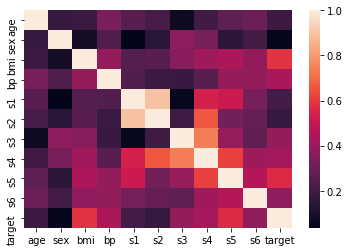

Feature bmi has the largest correlation with target feature, the correlation is 0.586450134474689


In [15]:
from sklearn import datasets, linear_model

diabetes = datasets.load_diabetes()                                 # load the diabetes dataset
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)  # make diabetes dataframe, specify col names
target = pd.DataFrame(diabetes.target, columns=["target"])          # target col is variable we wish to predict from data
df = pd.concat([data,target], axis=1)                               # concatenate data and target into one dataframe

corr = df.corr()                                                    # Calculate the correlation between x and y.
corr_abs=corr.abs()                                                 # get the absolute value of correlation
sns.heatmap(corr_abs,       
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)                        # create correlation heat map
plt.show()

corr_array = np.array(corr["target"])[:-1]
corr_abs_array = np.array(corr_abs["target"])[:-1]
i = np.argmax(corr_abs_array)
feature = corr.columns[i]
print('Feature', feature, 'has the largest correlation with target feature, the correlation is', corr_array[i])

### Conclusion and Further Resources
We have only just scratched the surface with these very powerful modules! Try to get familiar with the features covered here, and for those of you interested in seeing more examples, we strongly advise you to look at the following resource: https://jakevdp.github.io/PythonDataScienceHandbook/
